In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from catboost import CatBoostRegressor

# 전국

# 00. 시간, 지역을 고려하지않은 예측

# Data load

In [3]:
all_Data = pd.read_csv("../excel_data/hepatitisA_data_seoul.csv")

In [4]:
del all_Data["date"]

# One Hot Encoding

In [5]:
oneHot_Data = pd.get_dummies(all_Data,prefix="Area_")

In [6]:
patient = oneHot_Data["Patient"]
del oneHot_Data["Patient"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(oneHot_Data,patient, random_state=2000, test_size=0.1)

# Scaling

In [10]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Modeling

#### - Cross val score & Scoring

In [11]:
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1025,
    l2_leaf_reg=0.0125,
    loss_function='RMSE',
    border_count=254,
    logging_level="Info",
    random_state=2000)
result = cross_val_score(model,X_train,y_train,cv=5,scoring="r2")


so2, bin=2 score 3.73329868
pm10, bin=27 score 6.195502027
Average_freight_rate, bin=10 score 7.153132996
snowfall, bin=0 score 7.538109276
Water_temperature, bin=125 score 7.926477554
Water_temperature, bin=141 score 8.141046714
0:	learn: 0.4195459	total: 72.6ms	remaining: 36.2s

pm10, bin=27 score 3.110931634
so2, bin=2 score 5.594001915
nitric_nitrogen, bin=217 score 6.957466386
so2, bin=2 score 7.126324044
  tensor 1 is redundant, remove it and stop
1:	learn: 0.4051515	total: 76.6ms	remaining: 19.1s

so2, bin=2 score 2.270950405
pm10, bin=27 score 5.346363104
o3, bin=29 score 6.39822017
Lowest_temperature, bin=17 score 6.819890217
suspended_solids, bin=108 score 6.783150082
average_wind_speed, bin=12 score 6.935468491
2:	learn: 0.3858207	total: 82.7ms	remaining: 13.7s

pm10, bin=31 score 2.53112355
o3, bin=14 score 4.253179133
o3, bin=29 score 5.088899182
phosphatase, bin=70 score 5.600887597
E_coil, bin=70 score 5.758511466
ammonia_nitrogen, bin=133 score 6.118239705
3:	learn: 0.

E_coil, bin=80 score 0.6302101606
suspended_solids, bin=247 score 0.6090367712
dissolved_nitrogen, bin=196 score 0.9413376207
ammonia_nitrogen, bin=189 score 1.135581058
Month_4, bin=0 score 1.336786588
pm10, bin=24 score 1.58540711
50:	learn: 0.1693665	total: 407ms	remaining: 3.58s

Hydrogen_ion_concentration, bin=31 score 0.6142625848
Total_nitrogen, bin=24 score 0.6468248324
highest_temperature, bin=69 score 0.9087184413
Area__SW2, bin=0 score 1.092342418
average_wind_speed, bin=2 score 1.481191487
ammonia_nitrogen, bin=167 score 1.494248629
51:	learn: 0.1679309	total: 415ms	remaining: 3.57s

pm10, bin=0 score 0.7127297025
Hydrogen_ion_concentration, bin=84 score 0.718307319
ammonia_nitrogen, bin=24 score 0.9390195185
phosphatase, bin=82 score 1.148770165
E_coil, bin=138 score 1.366222884
Water_temperature, bin=215 score 1.592342491
52:	learn: 0.1658717	total: 422ms	remaining: 3.56s

dissolved_oxygen, bin=2 score 0.4916392532
o3, bin=3 score 0.770099958
dissolved_oxygen, bin=143 sco

Population, bin=141 score 0.4513617413
TOC, bin=51 score 0.6457448681
highest_temperature, bin=19 score 0.7681623255
suspended_solids, bin=28 score 0.8838575046
100:	learn: 0.1003827	total: 755ms	remaining: 2.98s

Population, bin=7 score 0.1944930422
average_wind_speed, bin=1 score 0.3394921885
Total_coliforms, bin=135 score 0.4262854532
dissolved_phosphorus , bin=25 score 0.5462846165
Total_evaporation, bin=76 score 0.65331985
Water_temperature, bin=136 score 0.7826181737
101:	learn: 0.0994370	total: 763ms	remaining: 2.98s

phosphatase, bin=71 score 0.1974746313
E_coil, bin=245 score 0.3578149124
Total_phosphorus, bin=80 score 0.4696827321
Average_relative_humidity, bin=7 score 0.6117834246
BOD, bin=116 score 0.7682246749
Population, bin=198 score 0.9171288713
102:	learn: 0.0981899	total: 771ms	remaining: 2.97s

Hydrogen_ion_concentration, bin=134 score 0.2175009082
no2, bin=14 score 0.3235790756
Average_freight_rate, bin=17 score 0.4700246563
Total_coliforms, bin=186 score 0.63268881

o3, bin=24 score 0.4189991591
monthly_combined_precipitation, bin=65 score 0.5095627695
COD, bin=108 score 0.5965139183
144:	learn: 0.0622531	total: 1.1s	remaining: 2.71s

suspended_solids, bin=7 score 0.1279254088
ammonia_nitrogen, bin=124 score 0.2124757559
Area__SE2, bin=0 score 0.3017992314
dissolved_nitrogen, bin=64 score 0.4072844862
suspended_solids, bin=221 score 0.4790022505
Total_phosphorus, bin=145 score 0.5506413018
145:	learn: 0.0615278	total: 1.11s	remaining: 2.69s

pm10, bin=0 score 0.1209064458
phosphatase, bin=136 score 0.1621892186
Total_phosphorus, bin=93 score 0.2502069035
Total_evaporation, bin=13 score 0.3406040983
Average_freight_rate, bin=26 score 0.4033621815
Population, bin=45 score 0.4945145893
146:	learn: 0.0609698	total: 1.12s	remaining: 2.69s

Total_phosphorus, bin=253 score 0.1076314636
dissolved_phosphorus , bin=252 score 0.1491193339
Water_temperature, bin=244 score 0.180819491
Water_temperature, bin=238 score 0.2655680372
dissolved_phosphorus , bin=98 

171:	learn: 0.0480549	total: 1.28s	remaining: 2.44s

Population, bin=7 score 0.0862889231
Average_freight_rate, bin=8 score 0.1483645351
ammonia_nitrogen, bin=3 score 0.1949000245
Population, bin=11 score 0.2291975853
phosphatase, bin=22 score 0.2953424404
ammonia_nitrogen, bin=44 score 0.3369247696
172:	learn: 0.0476497	total: 1.28s	remaining: 2.43s

daily_maximum_precipitation, bin=12 score 0.08334929587
ammonia_nitrogen, bin=251 score 0.1585570793
dissolved_nitrogen, bin=64 score 0.2071589294
dissolved_phosphorus , bin=248 score 0.2507669573
nitric_nitrogen, bin=90 score 0.289277703
BOD, bin=167 score 0.3400940086
173:	learn: 0.0473275	total: 1.29s	remaining: 2.42s

no2, bin=4 score 0.08556700375
dissolved_oxygen, bin=40 score 0.1518174379
Hydrogen_ion_concentration, bin=46 score 0.2295133002
E_coil, bin=144 score 0.2931985619
chlorophyll, bin=132 score 0.3797206319
Total_coliforms, bin=130 score 0.4706771595
174:	learn: 0.0466099	total: 1.3s	remaining: 2.41s

monthly_combined_preci

phosphatase, bin=173 score 0.2390265209
223:	learn: 0.0294402	total: 1.63s	remaining: 2s

ammonia_nitrogen, bin=238 score 0.05182588007
Hydrogen_ion_concentration, bin=27 score 0.09356026759
Ground_temperature, bin=14 score 0.1326007633
Water_temperature, bin=27 score 0.1676808779
suspended_solids, bin=70 score 0.2038548334
COD, bin=72 score 0.239280065
224:	learn: 0.0291434	total: 1.63s	remaining: 2s

Average_freight_rate, bin=1 score 0.05018952476
Hydrogen_ion_concentration, bin=92 score 0.09232019705
chlorophyll, bin=128 score 0.1286407187
average_wind_speed, bin=15 score 0.1630433991
E_coil, bin=78 score 0.2060632329
dissolved_oxygen, bin=154 score 0.2528269214
225:	learn: 0.0288431	total: 1.64s	remaining: 1.99s

Water_temperature, bin=243 score 0.05823996812
Water_temperature, bin=238 score 0.1019736592
Total_coliforms, bin=97 score 0.1311776107
chlorophyll, bin=144 score 0.1540596982
Area__SE1, bin=0 score 0.1924177154
BOD, bin=84 score 0.2265982396
226:	learn: 0.0285692	total: 1


ammonia_nitrogen, bin=124 score 0.03275824916
Area__SE2, bin=0 score 0.06953292399
dissolved_nitrogen, bin=62 score 0.1044720934
chlorophyll, bin=109 score 0.1297363938
BOD, bin=116 score 0.1554417589
average_wind_speed, bin=14 score 0.1785422371
273:	learn: 0.0186244	total: 1.98s	remaining: 1.63s

Hydrogen_ion_concentration, bin=127 score 0.03183796134
Total_coliforms, bin=131 score 0.04875889697
Total_evaporation, bin=76 score 0.06937429803
daily_maximum_precipitation, bin=52 score 0.09359840895
Hydrogen_ion_concentration, bin=74 score 0.1212016784
o3, bin=21 score 0.1535202635
274:	learn: 0.0184519	total: 1.99s	remaining: 1.63s

Total_nitrogen, bin=73 score 0.03585769069
dissolved_nitrogen, bin=52 score 0.05919023096
suspended_solids, bin=194 score 0.0813885408
Total_phosphorus, bin=146 score 0.1032811117
so2, bin=2 score 0.131161674
E_coil, bin=120 score 0.1597582286
275:	learn: 0.0182367	total: 2s	remaining: 1.62s

Hydrogen_ion_concentration, bin=56 score 0.03019686989
Hydrogen_i


Month_9, bin=0 score 0.01908829722
BOD, bin=183 score 0.03489760821
Hydrogen_ion_concentration, bin=31 score 0.05032779117
dissolved_oxygen, bin=38 score 0.06591384642
COD, bin=215 score 0.08420547592
Population, bin=226 score 0.1019567584
324:	learn: 0.0120197	total: 2.33s	remaining: 1.25s

COD, bin=131 score 0.02184523796
phosphatase, bin=216 score 0.03789922648
Total_phosphorus, bin=148 score 0.05208822463
Average_freight_rate, bin=11 score 0.07043194799
TOC, bin=117 score 0.09016423132
BOD, bin=116 score 0.1132319212
325:	learn: 0.0118525	total: 2.34s	remaining: 1.25s

Population, bin=250 score 0.02016414987
Population, bin=246 score 0.02944568606
phosphatase, bin=169 score 0.04024624402
phosphatase, bin=192 score 0.05379428473
nitric_nitrogen, bin=47 score 0.07045154712
suspended_solids, bin=182 score 0.08190749645
326:	learn: 0.0117704	total: 2.35s	remaining: 1.24s

Average_relative_humidity, bin=1 score 0.02250306989
electrical_conductivity, bin=218 score 0.03866843275
Total_ev

373:	learn: 0.0079543	total: 2.67s	remaining: 901ms

Total_phosphorus, bin=1 score 0.01230839035
ammonia_nitrogen, bin=0 score 0.01691398817
electrical_conductivity, bin=62 score 0.0206242206
Average_temperature, bin=9 score 0.03023070306
COD, bin=60 score 0.03873801535
Population, bin=134 score 0.05409099727
374:	learn: 0.0079025	total: 2.68s	remaining: 894ms

pm10, bin=31 score 0.0134038518
dissolved_oxygen, bin=235 score 0.0231938682
Area__NE1, bin=0 score 0.03418411224
Hydrogen_ion_concentration, bin=56 score 0.04584434511
ammonia_nitrogen, bin=184 score 0.05676995786
suspended_solids, bin=114 score 0.06784395369
375:	learn: 0.0078118	total: 2.69s	remaining: 887ms

electrical_conductivity, bin=253 score 0.01433300907
phosphatase, bin=251 score 0.02002061166
phosphatase, bin=136 score 0.0245300051
Hydrogen_ion_concentration, bin=92 score 0.0323209061
BOD, bin=173 score 0.04401978012
Total_coliforms, bin=131 score 0.05559037048
376:	learn: 0.0077614	total: 2.7s	remaining: 880ms

Aver

suspended_solids, bin=45 score 0.0196441415
Total_coliforms, bin=165 score 0.02662137166
E_coil, bin=166 score 0.03487138957
daily_maximum_precipitation, bin=27 score 0.04535964186
425:	learn: 0.0051443	total: 3.02s	remaining: 526ms

chlorophyll, bin=23 score 0.007986275671
dissolved_phosphorus , bin=138 score 0.01425284431
dissolved_phosphorus , bin=135 score 0.02161772797
pm10, bin=13 score 0.02695331178
Total_phosphorus, bin=145 score 0.03470387591
Total_phosphorus, bin=121 score 0.04317352885
426:	learn: 0.0050896	total: 3.03s	remaining: 518ms

phosphatase, bin=192 score 0.007751042137
phosphatase, bin=188 score 0.0164790362
pm10, bin=30 score 0.02233277527
Total_evaporation, bin=10 score 0.02722275123
electrical_conductivity, bin=159 score 0.03238569921
BOD, bin=93 score 0.03996584475
427:	learn: 0.0050454	total: 3.04s	remaining: 512ms

Total_evaporation, bin=0 score 0.008146692141
BOD, bin=60 score 0.01170061838
Ground_temperature, bin=69 score 0.01725070226
highest_temperature, 

average_wind_speed, bin=9 score 0.0351804558
451:	learn: 0.0041155	total: 3.2s	remaining: 340ms

ammonia_nitrogen, bin=223 score 0.006442416777
pm10, bin=37 score 0.01258109778
ammonia_nitrogen, bin=220 score 0.01562403325
Total_phosphorus, bin=119 score 0.01773680133
Total_phosphorus, bin=135 score 0.02328539937
suspended_solids, bin=222 score 0.02768741031
452:	learn: 0.0040915	total: 3.21s	remaining: 333ms

Total_coliforms, bin=10 score 0.007022022921
suspended_solids, bin=12 score 0.01042867261
chlorophyll, bin=167 score 0.01450356319
Total_nitrogen, bin=24 score 0.019652335
TOC, bin=97 score 0.02534366075
monthly_combined_precipitation, bin=38 score 0.02969354635
453:	learn: 0.0040623	total: 3.21s	remaining: 326ms

COD, bin=10 score 0.007410814482
suspended_solids, bin=46 score 0.01248834025
Lowest_temperature, bin=79 score 0.01666046975
COD, bin=60 score 0.02048004201
E_coil, bin=196 score 0.02500534717
TOC, bin=40 score 0.03003781401
454:	learn: 0.0040341	total: 3.22s	remaining:


pm10, bin=31 score 3.351559272
Lowest_temperature, bin=50 score 6.351715726
Lowest_temperature, bin=13 score 6.194417147
electrical_conductivity, bin=124 score 6.731074571
Water_temperature, bin=182 score 6.811862659
so2, bin=2 score 6.620020996
0:	learn: 0.4332680	total: 8.57ms	remaining: 4.28s

daily_maximum_precipitation, bin=73 score 2.762738696
Month_5, bin=0 score 4.687011182
COD, bin=121 score 5.493435305
Total_nitrogen, bin=56 score 5.97546251
Total_phosphorus, bin=181 score 6.78732936
TOC, bin=59 score 6.68582101
1:	learn: 0.4189709	total: 16ms	remaining: 3.97s

pm10, bin=27 score 3.792490887
o3, bin=14 score 5.437226401
daily_maximum_precipitation, bin=5 score 6.036748791
pm10, bin=5 score 6.787213507
Average_relative_humidity, bin=12 score 6.544751069
phosphatase, bin=131 score 7.922984218
2:	learn: 0.4005692	total: 23.2ms	remaining: 3.85s

pm10, bin=31 score 3.228344097
no2, bin=17 score 4.642507593
Average_relative_humidity, bin=13 score 5.209292176
co, bin=0 score 5.8692

50:	learn: 0.1664243	total: 352ms	remaining: 3.1s

Lowest_temperature, bin=80 score 0.6537738465
E_coil, bin=142 score 0.7670744785
chlorophyll, bin=97 score 0.897200634
Population, bin=250 score 1.110290035
Average_freight_rate, bin=9 score 1.22667054
no2, bin=15 score 1.313588506
51:	learn: 0.1650413	total: 359ms	remaining: 3.09s

Average_temperature, bin=9 score 0.4903015524
pm10, bin=11 score 0.689006382
Average_temperature, bin=64 score 0.8720901061
no2, bin=5 score 1.026216169
Average_relative_humidity, bin=16 score 1.350257656
COD, bin=182 score 1.565725634
52:	learn: 0.1632138	total: 366ms	remaining: 3.09s

TOC, bin=18 score 0.5579673549
co, bin=0 score 0.9063535392
daily_maximum_precipitation, bin=49 score 0.9055997888
Water_temperature, bin=156 score 1.213056392
Population, bin=140 score 1.426834617
Month_5, bin=0 score 1.794885342
53:	learn: 0.1611877	total: 374ms	remaining: 3.08s

average_wind_speed, bin=10 score 0.469186077
dissolved_nitrogen, bin=49 score 0.7943499546
Are

99:	learn: 0.0983140	total: 701ms	remaining: 2.8s

monthly_combined_precipitation, bin=84 score 0.1900208866
Water_temperature, bin=157 score 0.3471605353
Lowest_temperature, bin=52 score 0.5139312141
suspended_solids, bin=41 score 0.6146500384
average_wind_speed, bin=8 score 0.7418245688
COD, bin=157 score 0.907252276
100:	learn: 0.0969728	total: 708ms	remaining: 2.8s

COD, bin=166 score 0.209986475
TOC, bin=92 score 0.3847280878
phosphatase, bin=117 score 0.5166151105
Total_coliforms, bin=181 score 0.6960267927
dissolved_oxygen, bin=111 score 0.8597393043
Total_evaporation, bin=37 score 1.053326422
101:	learn: 0.0952022	total: 715ms	remaining: 2.79s

Average_relative_humidity, bin=1 score 0.1823488811
COD, bin=166 score 0.2757194143
suspended_solids, bin=109 score 0.4017038344
E_coil, bin=26 score 0.5416549502
Population, bin=78 score 0.7055359704
dissolved_nitrogen, bin=191 score 0.8778174538
102:	learn: 0.0939274	total: 723ms	remaining: 2.79s

pm10, bin=0 score 0.1810694918
chlorop

Water_temperature, bin=23 score 0.3651210453
Total_coliforms, bin=43 score 0.4406118714
Water_temperature, bin=49 score 0.5069671707
148:	learn: 0.0599423	total: 1.05s	remaining: 2.47s

Average_relative_humidity, bin=1 score 0.1284442153
phosphatase, bin=2 score 0.1787952763
o3, bin=3 score 0.2101371792
electrical_conductivity, bin=252 score 0.2624304318
ammonia_nitrogen, bin=85 score 0.3016777942
Hydrogen_ion_concentration, bin=119 score 0.3555867044
149:	learn: 0.0596562	total: 1.06s	remaining: 2.47s

monthly_combined_precipitation, bin=2 score 0.1049551667
BOD, bin=195 score 0.1603138168
average_wind_speed, bin=7 score 0.2785481609
ammonia_nitrogen, bin=21 score 0.3274524436
daily_maximum_precipitation, bin=44 score 0.3838994939
Hydrogen_ion_concentration, bin=51 score 0.474033212
150:	learn: 0.0591484	total: 1.06s	remaining: 2.46s

ammonia_nitrogen, bin=237 score 0.1015190399
BOD, bin=220 score 0.1831224034
ammonia_nitrogen, bin=230 score 0.2646082317
Average_temperature, bin=10 sc

Population, bin=85 score 0.2929690891
Total_coliforms, bin=158 score 0.3654232966
198:	learn: 0.0369032	total: 1.4s	remaining: 2.11s

Total_phosphorus, bin=200 score 0.05755576165
chlorophyll, bin=222 score 0.101592677
Total_evaporation, bin=76 score 0.1476290226
phosphatase, bin=33 score 0.1980084671
ammonia_nitrogen, bin=65 score 0.2472553291
Average_freight_rate, bin=22 score 0.299570751
199:	learn: 0.0365237	total: 1.41s	remaining: 2.11s

nitric_nitrogen, bin=5 score 0.05668630439
Total_coliforms, bin=233 score 0.08025779367
Total_nitrogen, bin=102 score 0.1266892386
dissolved_oxygen, bin=7 score 0.1701197111
nitric_nitrogen, bin=185 score 0.2049715442
dissolved_oxygen, bin=172 score 0.2416178502
200:	learn: 0.0363120	total: 1.41s	remaining: 2.1s

suspended_solids, bin=7 score 0.05698589276
Total_phosphorus, bin=200 score 0.08561759862
Population, bin=238 score 0.1233002477
COD, bin=192 score 0.1695146212
Total_evaporation, bin=65 score 0.21933411
monthly_combined_precipitation, bi

Hydrogen_ion_concentration, bin=50 score 0.1382292681
249:	learn: 0.0227995	total: 1.74s	remaining: 1.74s

average_wind_speed, bin=2 score 0.03667003241
dissolved_nitrogen, bin=183 score 0.06304582087
Total_nitrogen, bin=177 score 0.09865060779
E_coil, bin=153 score 0.1287031424
BOD, bin=186 score 0.1614020993
nitric_nitrogen, bin=147 score 0.1904660877
250:	learn: 0.0226068	total: 1.75s	remaining: 1.74s

Average_relative_humidity, bin=1 score 0.03538934594
electrical_conductivity, bin=210 score 0.05956710913
electrical_conductivity, bin=199 score 0.08725196664
E_coil, bin=158 score 0.1074903786
Month_3, bin=0 score 0.1365316159
Water_temperature, bin=106 score 0.165454712
251:	learn: 0.0224227	total: 1.76s	remaining: 1.73s

nitric_nitrogen, bin=252 score 0.03915416338
Population, bin=165 score 0.05552277503
Population, bin=176 score 0.09010209243
monthly_combined_precipitation, bin=87 score 0.1129494844
electrical_conductivity, bin=150 score 0.1339095509
phosphatase, bin=128 score 0.1


Total_coliforms, bin=6 score 0.02057138986
Total_nitrogen, bin=129 score 0.03489443547
dissolved_nitrogen, bin=137 score 0.05808769099
dissolved_nitrogen, bin=120 score 0.07362487041
electrical_conductivity, bin=99 score 0.08678606343
Total_coliforms, bin=122 score 0.1022509395
300:	learn: 0.0142558	total: 2.1s	remaining: 1.39s

Total_phosphorus, bin=243 score 0.02020399188
pm10, bin=18 score 0.03479315312
ammonia_nitrogen, bin=114 score 0.05163961348
electrical_conductivity, bin=71 score 0.07741075071
Total_nitrogen, bin=45 score 0.1053460857
E_coil, bin=149 score 0.1325801886
301:	learn: 0.0140763	total: 2.1s	remaining: 1.38s

phosphatase, bin=80 score 0.02162621164
dissolved_phosphorus , bin=88 score 0.0451596386
Ground_temperature, bin=29 score 0.06940609901
daily_maximum_precipitation, bin=48 score 0.0897982694
dissolved_oxygen, bin=152 score 0.1123889051
chlorophyll, bin=101 score 0.1425330314
302:	learn: 0.0138549	total: 2.11s	remaining: 1.37s

E_coil, bin=1 score 0.02277889457


dissolved_oxygen, bin=2 score 0.01414292522
COD, bin=14 score 0.01954776195
Total_phosphorus, bin=141 score 0.02682438619
BOD, bin=65 score 0.03762032968
Population, bin=52 score 0.04808458437
BOD, bin=39 score 0.0606632055
350:	learn: 0.0089580	total: 2.44s	remaining: 1.04s

Water_temperature, bin=44 score 0.01852336936
Total_coliforms, bin=212 score 0.03083880296
E_coil, bin=236 score 0.04115733897
COD, bin=73 score 0.05025072563
Hydrogen_ion_concentration, bin=104 score 0.06003596546
pm10, bin=18 score 0.07265116753
351:	learn: 0.0088808	total: 2.45s	remaining: 1.03s

dissolved_phosphorus , bin=222 score 0.01257593714
no2, bin=18 score 0.02633650421
Total_phosphorus, bin=151 score 0.03561432634
Lowest_temperature, bin=25 score 0.04622909699
nitric_nitrogen, bin=197 score 0.0627347104
snowfall, bin=2 score 0.07790964151
352:	learn: 0.0087778	total: 2.46s	remaining: 1.02s

TOC, bin=185 score 0.01204151143
TOC, bin=192 score 0.02902556064
Population, bin=204 score 0.04017745824
E_coil


Total_phosphorus, bin=10 score 0.01150106614
Total_phosphorus, bin=13 score 0.01960166804
nitric_nitrogen, bin=224 score 0.02418013086
ammonia_nitrogen, bin=18 score 0.03056998158
ammonia_nitrogen, bin=16 score 0.03722901303
Total_nitrogen, bin=212 score 0.04181715633
378:	learn: 0.0070324	total: 2.62s	remaining: 837ms

Total_phosphorus, bin=246 score 0.01082101603
dissolved_oxygen, bin=229 score 0.01709064233
Water_temperature, bin=8 score 0.02580646742
dissolved_oxygen, bin=221 score 0.03379790438
nitric_nitrogen, bin=39 score 0.03937707809
BOD, bin=40 score 0.04392860864
379:	learn: 0.0069980	total: 2.63s	remaining: 831ms

dissolved_oxygen, bin=18 score 0.01235705451
dissolved_oxygen, bin=20 score 0.02128070242
electrical_conductivity, bin=162 score 0.02919483252
COD, bin=129 score 0.03507293373
highest_temperature, bin=45 score 0.04482994345
Water_temperature, bin=127 score 0.05273576164
380:	learn: 0.0069442	total: 2.64s	remaining: 824ms

Hydrogen_ion_concentration, bin=11 score 

428:	learn: 0.0046571	total: 2.96s	remaining: 490ms

E_coil, bin=203 score 0.006455196382
chlorophyll, bin=28 score 0.01376221899
chlorophyll, bin=38 score 0.01879740611
electrical_conductivity, bin=119 score 0.02390145837
Total_coliforms, bin=139 score 0.02861967176
Total_evaporation, bin=23 score 0.03562436088
429:	learn: 0.0046174	total: 2.97s	remaining: 484ms

ammonia_nitrogen, bin=252 score 0.007392935094
Total_evaporation, bin=41 score 0.0108300077
BOD, bin=12 score 0.01565128507
Average_relative_humidity, bin=10 score 0.02011213176
chlorophyll, bin=129 score 0.02533527236
electrical_conductivity, bin=73 score 0.0320457459
430:	learn: 0.0045894	total: 2.98s	remaining: 477ms

nitric_nitrogen, bin=185 score 0.007495315637
nitric_nitrogen, bin=183 score 0.01830786444
Total_phosphorus, bin=160 score 0.02213951519
dissolved_oxygen, bin=110 score 0.02630116658
TOC, bin=170 score 0.03247543261
Total_coliforms, bin=169 score 0.03803947153
431:	learn: 0.0045417	total: 2.98s	remaining: 470


nitric_nitrogen, bin=3 score 0.005083913798
E_coil, bin=46 score 0.006519092797
Water_temperature, bin=216 score 0.01000500452
Average_freight_rate, bin=18 score 0.01386747606
pm10, bin=14 score 0.01792471412
Area__SE2, bin=0 score 0.02392049476
477:	learn: 0.0030975	total: 3.32s	remaining: 153ms

Total_phosphorus, bin=1 score 0.004682744689
Month_10, bin=0 score 0.006628559967
COD, bin=34 score 0.01089624483
phosphatase, bin=184 score 0.01397133819
Hydrogen_ion_concentration, bin=97 score 0.01788622888
dissolved_oxygen, bin=31 score 0.02212265104
478:	learn: 0.0030737	total: 3.33s	remaining: 146ms

Ground_temperature, bin=2 score 0.005783263445
Population, bin=40 score 0.008804931187
electrical_conductivity, bin=6 score 0.01172119489
pm10, bin=27 score 0.01489961491
Population, bin=60 score 0.01809482204
Area__SE1, bin=0 score 0.02078678352
479:	learn: 0.0030536	total: 3.33s	remaining: 139ms

Population, bin=18 score 0.004445134623
electrical_conductivity, bin=94 score 0.009348371984

22:	learn: 0.2400204	total: 168ms	remaining: 3.49s

snowfall, bin=16 score 1.200106762
pm10, bin=31 score 1.422181417
co, bin=1 score 1.802927664
electrical_conductivity, bin=73 score 2.179764892
Average_temperature, bin=25 score 2.67735249
dissolved_nitrogen, bin=44 score 2.986892387
23:	learn: 0.2364084	total: 177ms	remaining: 3.5s

Month_9, bin=0 score 1.13907317
Hydrogen_ion_concentration, bin=95 score 1.094739089
Total_phosphorus, bin=201 score 1.576665822
TOC, bin=12 score 1.933002495
COD, bin=129 score 2.341056084
dissolved_oxygen, bin=148 score 2.679742678
24:	learn: 0.2331007	total: 185ms	remaining: 3.51s

BOD, bin=25 score 1.102699943
nitric_nitrogen, bin=77 score 1.463332615
dissolved_oxygen, bin=87 score 1.978585932
Total_evaporation, bin=46 score 2.216238797
Average_relative_humidity, bin=12 score 2.667111794
no2, bin=11 score 3.055277834
25:	learn: 0.2284547	total: 192ms	remaining: 3.5s

no2, bin=1 score 0.881077248
average_wind_speed, bin=12 score 1.316072614
Average_tem

suspended_solids, bin=193 score 1.256451317
71:	learn: 0.1361902	total: 517ms	remaining: 3.07s

electrical_conductivity, bin=210 score 0.3270474868
Hydrogen_ion_concentration, bin=80 score 0.5613795947
Hydrogen_ion_concentration, bin=39 score 0.8408689824
monthly_combined_precipitation, bin=53 score 0.9994719979
Average_freight_rate, bin=18 score 1.232084728
TOC, bin=162 score 1.433312095
72:	learn: 0.1340693	total: 524ms	remaining: 3.07s

BOD, bin=251 score 0.2805341248
Hydrogen_ion_concentration, bin=138 score 0.4350268881
o3, bin=3 score 0.5464372283
chlorophyll, bin=52 score 0.6501448707
Total_phosphorus, bin=3 score 0.888532091
E_coil, bin=149 score 0.9929192775
73:	learn: 0.1330165	total: 532ms	remaining: 3.06s

Population, bin=248 score 0.3452898563
E_coil, bin=58 score 0.471498874
Total_coliforms, bin=82 score 0.6374434026
chlorophyll, bin=245 score 0.7893831762
average_wind_speed, bin=12 score 0.9012307046
Total_phosphorus, bin=136 score 1.079050588
74:	learn: 0.1316231	total:


dissolved_oxygen, bin=1 score 0.1438020659
Water_temperature, bin=8 score 0.2021467062
Ground_temperature, bin=9 score 0.2686563511
Average_freight_rate, bin=2 score 0.3545211456
ammonia_nitrogen, bin=230 score 0.4281551085
Population, bin=40 score 0.4921740149
121:	learn: 0.0773065	total: 872ms	remaining: 2.7s

Average_freight_rate, bin=12 score 0.1427738612
Month_10, bin=0 score 0.3153083845
Total_coliforms, bin=170 score 0.4138473561
monthly_combined_precipitation, bin=57 score 0.526543813
Population, bin=11 score 0.6470010891
COD, bin=75 score 0.7263566809
122:	learn: 0.0762192	total: 885ms	remaining: 2.71s

nitric_nitrogen, bin=3 score 0.1337383312
monthly_combined_precipitation, bin=84 score 0.1997584418
phosphatase, bin=133 score 0.3021449548
TOC, bin=0 score 0.403984999
suspended_solids, bin=116 score 0.506887175
Average_freight_rate, bin=36 score 0.5997945638
123:	learn: 0.0755115	total: 898ms	remaining: 2.72s

Hydrogen_ion_concentration, bin=144 score 0.1708924608
dissolved_

157:	learn: 0.0548858	total: 1.22s	remaining: 2.64s

monthly_combined_precipitation, bin=84 score 0.1147870987
Population, bin=238 score 0.1699101598
COD, bin=201 score 0.2396193683
monthly_combined_precipitation, bin=61 score 0.3156721638
TOC, bin=175 score 0.4065254752
no2, bin=11 score 0.4822362945
158:	learn: 0.0542868	total: 1.23s	remaining: 2.63s

Total_coliforms, bin=84 score 0.09288689957
E_coil, bin=68 score 0.1964167279
Hydrogen_ion_concentration, bin=59 score 0.2787830535
suspended_solids, bin=206 score 0.3522788455
phosphatase, bin=93 score 0.4377767751
Average_freight_rate, bin=11 score 0.5537694092
159:	learn: 0.0533688	total: 1.24s	remaining: 2.63s

dissolved_oxygen, bin=1 score 0.0911868204
dissolved_oxygen, bin=17 score 0.1272125989
electrical_conductivity, bin=95 score 0.1916242458
Water_temperature, bin=215 score 0.3026064566
suspended_solids, bin=83 score 0.3534136284
TOC, bin=95 score 0.441346391
160:	learn: 0.0527832	total: 1.25s	remaining: 2.63s

ammonia_nitrogen

chlorophyll, bin=122 score 0.3215599262
Hydrogen_ion_concentration, bin=75 score 0.3833291875
194:	learn: 0.0388493	total: 1.58s	remaining: 2.47s

COD, bin=225 score 0.06482154392
COD, bin=190 score 0.1209410717
Total_coliforms, bin=84 score 0.1688484907
E_coil, bin=123 score 0.2245601676
Average_freight_rate, bin=10 score 0.2767267028
phosphatase, bin=85 score 0.336107652
195:	learn: 0.0384345	total: 1.59s	remaining: 2.46s

electrical_conductivity, bin=253 score 0.07357682995
electrical_conductivity, bin=211 score 0.1072130593
dissolved_oxygen, bin=39 score 0.1437387785
Total_evaporation, bin=48 score 0.1847547387
Total_evaporation, bin=58 score 0.2351105576
chlorophyll, bin=211 score 0.2960415412
196:	learn: 0.0381404	total: 1.6s	remaining: 2.46s

pm10, bin=0 score 0.06210949813
Population, bin=180 score 0.1009815363
dissolved_phosphorus , bin=48 score 0.1500261408
ammonia_nitrogen, bin=41 score 0.1884709579
Area__NE1, bin=0 score 0.240949976
COD, bin=66 score 0.3053764677
197:	learn

E_coil, bin=17 score 0.07219430428
no2, bin=18 score 0.09819120025
Hydrogen_ion_concentration, bin=19 score 0.1344348678
Total_nitrogen, bin=51 score 0.1681527248
phosphatase, bin=31 score 0.1945664475
233:	learn: 0.0271647	total: 1.93s	remaining: 2.19s

Ground_temperature, bin=9 score 0.0460089209
Water_temperature, bin=17 score 0.08398424541
Month_1, bin=0 score 0.1209301692
COD, bin=164 score 0.1480210077
TOC, bin=30 score 0.172726661
dissolved_phosphorus , bin=221 score 0.1997025876
234:	learn: 0.0269709	total: 1.94s	remaining: 2.19s

phosphatase, bin=12 score 0.05003322757
nitric_nitrogen, bin=219 score 0.08056891238
BOD, bin=242 score 0.1084415232
suspended_solids, bin=217 score 0.1322191735
phosphatase, bin=127 score 0.1588958098
ammonia_nitrogen, bin=156 score 0.1999669521
235:	learn: 0.0267389	total: 1.95s	remaining: 2.18s

COD, bin=226 score 0.04754265379
Population, bin=211 score 0.07529344727
phosphatase, bin=164 score 0.1088641934
Hydrogen_ion_concentration, bin=36 score 0


Total_phosphorus, bin=3 score 0.02995233008
daily_maximum_precipitation, bin=25 score 0.04274309935
electrical_conductivity, bin=180 score 0.06429969389
Population, bin=55 score 0.09963379791
Population, bin=62 score 0.1269166568
no2, bin=17 score 0.1505732718
271:	learn: 0.0192637	total: 2.29s	remaining: 1.92s

Total_phosphorus, bin=211 score 0.03209158762
dissolved_phosphorus , bin=215 score 0.0574983767
no2, bin=18 score 0.08360226086
electrical_conductivity, bin=77 score 0.1046021465
Month_11, bin=0 score 0.1300035651
chlorophyll, bin=73 score 0.1606584484
272:	learn: 0.0190799	total: 2.29s	remaining: 1.91s

Hydrogen_ion_concentration, bin=107 score 0.02946159505
o3, bin=0 score 0.05336714624
monthly_combined_precipitation, bin=31 score 0.07852046137
monthly_combined_precipitation, bin=26 score 0.09842985212
Population, bin=59 score 0.1226374318
electrical_conductivity, bin=211 score 0.1472770071
273:	learn: 0.0189225	total: 2.3s	remaining: 1.9s

ammonia_nitrogen, bin=192 score 0.

ammonia_nitrogen, bin=199 score 0.08266542177
310:	learn: 0.0130620	total: 2.63s	remaining: 1.6s

dissolved_nitrogen, bin=22 score 0.02197238346
electrical_conductivity, bin=247 score 0.03796767208
monthly_combined_precipitation, bin=52 score 0.04904770207
electrical_conductivity, bin=204 score 0.06345403513
chlorophyll, bin=206 score 0.08276824048
monthly_combined_precipitation, bin=39 score 0.0997988549
311:	learn: 0.0129735	total: 2.64s	remaining: 1.59s

Total_phosphorus, bin=248 score 0.02121351387
E_coil, bin=237 score 0.03000874425
Total_coliforms, bin=224 score 0.04537560853
Population, bin=180 score 0.05479923155
suspended_solids, bin=185 score 0.07125557912
dissolved_phosphorus , bin=107 score 0.08884996951
312:	learn: 0.0128797	total: 2.65s	remaining: 1.58s

electrical_conductivity, bin=2 score 0.0199928541
monthly_combined_precipitation, bin=61 score 0.02814588313
Water_temperature, bin=101 score 0.05112068546
Lowest_temperature, bin=40 score 0.07083146662
Hydrogen_ion_conce

356:	learn: 0.0088788	total: 2.98s	remaining: 1.19s

ammonia_nitrogen, bin=253 score 0.0193435604
Total_nitrogen, bin=225 score 0.02438812323
ammonia_nitrogen, bin=192 score 0.03325487469
Total_coliforms, bin=121 score 0.04582400444
Total_coliforms, bin=151 score 0.05662072019
phosphatase, bin=53 score 0.06860566425
357:	learn: 0.0088107	total: 2.99s	remaining: 1.19s

Month_9, bin=0 score 0.01357348799
BOD, bin=32 score 0.02939956276
Population, bin=28 score 0.0415414334
electrical_conductivity, bin=38 score 0.05518642521
phosphatase, bin=113 score 0.06944016892
electrical_conductivity, bin=73 score 0.08315391467
358:	learn: 0.0086875	total: 3s	remaining: 1.18s

Hydrogen_ion_concentration, bin=148 score 0.01538328776
E_coil, bin=3 score 0.0206451468
Hydrogen_ion_concentration, bin=107 score 0.02561172195
average_wind_speed, bin=15 score 0.03358103758
TOC, bin=125 score 0.0459738749
chlorophyll, bin=135 score 0.05855668864
359:	learn: 0.0086341	total: 3s	remaining: 1.17s

E_coil, bin=24

405:	learn: 0.0058516	total: 3.33s	remaining: 770ms

Total_evaporation, bin=53 score 0.009757639856
dissolved_nitrogen, bin=160 score 0.01925986843
Water_temperature, bin=231 score 0.02696651218
Population, bin=54 score 0.03696939479
chlorophyll, bin=167 score 0.04616997765
COD, bin=80 score 0.05725940421
406:	learn: 0.0057669	total: 3.33s	remaining: 762ms

average_wind_speed, bin=2 score 0.008968767957
BOD, bin=69 score 0.01754090745
Total_phosphorus, bin=85 score 0.02391456832
dissolved_oxygen, bin=58 score 0.03306483917
Total_phosphorus, bin=75 score 0.04390215453
COD, bin=95 score 0.05111739805
407:	learn: 0.0056959	total: 3.34s	remaining: 754ms

dissolved_nitrogen, bin=118 score 0.009330546764
dissolved_nitrogen, bin=92 score 0.01784244261
nitric_nitrogen, bin=73 score 0.02632817928
Total_coliforms, bin=119 score 0.03499054953
BOD, bin=43 score 0.04355549526
electrical_conductivity, bin=103 score 0.0543126676
408:	learn: 0.0056304	total: 3.35s	remaining: 746ms

Total_phosphorus, b


COD, bin=59 score 0.006097080058
suspended_solids, bin=55 score 0.01202644009
ammonia_nitrogen, bin=173 score 0.01751328432
E_coil, bin=48 score 0.02389003034
Average_freight_rate, bin=10 score 0.02979554657
BOD, bin=96 score 0.03789317153
453:	learn: 0.0038513	total: 3.68s	remaining: 373ms

Water_temperature, bin=74 score 0.006036556512
Average_temperature, bin=30 score 0.01294094112
E_coil, bin=208 score 0.01719752776
Total_coliforms, bin=114 score 0.02225322434
TOC, bin=93 score 0.02777680537
suspended_solids, bin=181 score 0.03414509588
454:	learn: 0.0038069	total: 3.69s	remaining: 365ms

nitric_nitrogen, bin=249 score 0.006032847319
monthly_combined_precipitation, bin=25 score 0.009407157701
Population, bin=216 score 0.0128762214
Average_freight_rate, bin=7 score 0.01707106754
suspended_solids, bin=174 score 0.02299071263
snowfall, bin=2 score 0.02731527435
455:	learn: 0.0037791	total: 3.7s	remaining: 357ms

Total_coliforms, bin=25 score 0.005925787504
ammonia_nitrogen, bin=8 sco

Lowest_temperature, bin=67 score 0.02130304121
ammonia_nitrogen, bin=148 score 0.02678653303
480:	learn: 0.0030312	total: 3.85s	remaining: 152ms

Total_evaporation, bin=0 score 0.005800280389
ammonia_nitrogen, bin=0 score 0.007489604553
dissolved_oxygen, bin=95 score 0.008930486947
dissolved_oxygen, bin=103 score 0.01339483301
Total_evaporation, bin=22 score 0.01612498812
COD, bin=48 score 0.01870948373
481:	learn: 0.0030155	total: 3.86s	remaining: 144ms

dissolved_nitrogen, bin=22 score 0.004586461677
monthly_combined_precipitation, bin=49 score 0.008159914566
dissolved_oxygen, bin=179 score 0.01189794148
phosphatase, bin=26 score 0.01568302575
Total_coliforms, bin=35 score 0.01993751617
highest_temperature, bin=47 score 0.02451408282
482:	learn: 0.0029883	total: 3.87s	remaining: 136ms

Total_coliforms, bin=1 score 0.004536755383
Average_relative_humidity, bin=1 score 0.007180660946
ammonia_nitrogen, bin=71 score 0.009158846034
Population, bin=36 score 0.01179845795
phosphatase, bin=1


highest_temperature, bin=70 score 1.076621762
Lowest_temperature, bin=63 score 1.327596314
average_wind_speed, bin=3 score 1.753750851
electrical_conductivity, bin=190 score 1.848133424
nitric_nitrogen, bin=21 score 2.214768142
Total_nitrogen, bin=153 score 2.192672384
26:	learn: 0.2179901	total: 177ms	remaining: 3.1s

Population, bin=4 score 1.046172714
TOC, bin=63 score 1.561542431
Total_evaporation, bin=59 score 1.764489726
pm10, bin=19 score 1.987407989
Population, bin=179 score 2.109276774
TOC, bin=18 score 2.392378137
27:	learn: 0.2147323	total: 184ms	remaining: 3.1s

Population, bin=251 score 1.039057595
monthly_combined_precipitation, bin=52 score 1.352524772
co, bin=1 score 1.518953449
o3, bin=8 score 1.668399398
TOC, bin=113 score 1.997713925
electrical_conductivity, bin=31 score 2.433584624
28:	learn: 0.2110599	total: 191ms	remaining: 3.1s

Average_temperature, bin=0 score 0.9890482685
Total_nitrogen, bin=22 score 1.123757549
Average_relative_humidity, bin=12 score 1.128081

76:	learn: 0.1200684	total: 518ms	remaining: 2.84s

dissolved_oxygen, bin=16 score 0.3214503612
dissolved_nitrogen, bin=29 score 0.467133499
Total_nitrogen, bin=38 score 0.6676657995
Average_temperature, bin=44 score 0.7863768221
Lowest_temperature, bin=36 score 0.8793749089
Hydrogen_ion_concentration, bin=71 score 0.9894955574
77:	learn: 0.1188363	total: 524ms	remaining: 2.84s

ammonia_nitrogen, bin=0 score 0.2980606443
monthly_combined_precipitation, bin=1 score 0.4188903029
electrical_conductivity, bin=212 score 0.5188873772
Hydrogen_ion_concentration, bin=81 score 0.6423635555
Hydrogen_ion_concentration, bin=41 score 0.9199815346
dissolved_phosphorus , bin=25 score 1.058510917
78:	learn: 0.1175422	total: 531ms	remaining: 2.83s

Average_relative_humidity, bin=1 score 0.2980820024
dissolved_oxygen, bin=139 score 0.4217401539
Water_temperature, bin=31 score 0.5525628866
Population, bin=22 score 0.6664532955
Average_freight_rate, bin=7 score 0.8395843857
electrical_conductivity, bin=87

E_coil, bin=80 score 0.8356015528
103:	learn: 0.0886889	total: 692ms	remaining: 2.63s

Population, bin=5 score 0.1965533305
Total_evaporation, bin=83 score 0.2879553941
electrical_conductivity, bin=223 score 0.4108102635
Hydrogen_ion_concentration, bin=80 score 0.53799887
Total_coliforms, bin=165 score 0.6677645025
average_wind_speed, bin=8 score 0.7782208194
104:	learn: 0.0877575	total: 699ms	remaining: 2.63s

dissolved_phosphorus , bin=252 score 0.1711732976
E_coil, bin=246 score 0.2411362871
average_wind_speed, bin=8 score 0.3046037862
nitric_nitrogen, bin=217 score 0.4024462736
no2, bin=10 score 0.4907051366
Total_coliforms, bin=228 score 0.6048833109
105:	learn: 0.0871881	total: 706ms	remaining: 2.62s

highest_temperature, bin=70 score 0.1620410058
Lowest_temperature, bin=62 score 0.321544103
COD, bin=39 score 0.408614396
dissolved_nitrogen, bin=143 score 0.5343153531
daily_maximum_precipitation, bin=58 score 0.6467721229
BOD, bin=80 score 0.7824893281
106:	learn: 0.0861210	total:

Water_temperature, bin=92 score 0.2211672825
Total_evaporation, bin=45 score 0.3294007089
nitric_nitrogen, bin=85 score 0.4181733939
Hydrogen_ion_concentration, bin=64 score 0.4898812371
154:	learn: 0.0530872	total: 1.04s	remaining: 2.31s

Month_9, bin=0 score 0.1062616561
Total_phosphorus, bin=60 score 0.1820698642
dissolved_oxygen, bin=67 score 0.2639153884
nitric_nitrogen, bin=26 score 0.3244165517
TOC, bin=46 score 0.3940297591
average_wind_speed, bin=7 score 0.4956673245
155:	learn: 0.0525005	total: 1.04s	remaining: 2.31s

Average_freight_rate, bin=3 score 0.1014874645
ammonia_nitrogen, bin=3 score 0.1522169108
Total_phosphorus, bin=8 score 0.2052620035
E_coil, bin=31 score 0.253234892
Total_coliforms, bin=16 score 0.3024161596
E_coil, bin=56 score 0.3588438009
156:	learn: 0.0521135	total: 1.05s	remaining: 2.3s

nitric_nitrogen, bin=251 score 0.08666344861
phosphatase, bin=71 score 0.1444708611
Total_coliforms, bin=9 score 0.2087041713
BOD, bin=248 score 0.2649601456
chlorophyll, 

pm10, bin=13 score 0.2295608868
o3, bin=13 score 0.2715494199
207:	learn: 0.0320779	total: 1.38s	remaining: 1.94s

phosphatase, bin=43 score 0.05882433141
phosphatase, bin=81 score 0.1113831281
dissolved_oxygen, bin=124 score 0.1585411936
average_wind_speed, bin=7 score 0.2046748301
Population, bin=43 score 0.2610315397
suspended_solids, bin=197 score 0.3149649845
208:	learn: 0.0316179	total: 1.39s	remaining: 1.94s

E_coil, bin=248 score 0.06448651038
Average_freight_rate, bin=39 score 0.1040826877
dissolved_phosphorus , bin=156 score 0.1456157323
E_coil, bin=223 score 0.1800522968
COD, bin=111 score 0.2117549523
average_wind_speed, bin=11 score 0.2453751595
209:	learn: 0.0313414	total: 1.4s	remaining: 1.93s

dissolved_oxygen, bin=235 score 0.05646459466
TOC, bin=206 score 0.08466751553
ammonia_nitrogen, bin=245 score 0.120236193
chlorophyll, bin=227 score 0.1554640058
dissolved_oxygen, bin=225 score 0.1879554663
Average_relative_humidity, bin=9 score 0.215288135
210:	learn: 0.0311387	

Hydrogen_ion_concentration, bin=26 score 0.1125494848
monthly_combined_precipitation, bin=52 score 0.1410125495
257:	learn: 0.0197182	total: 1.73s	remaining: 1.62s

suspended_solids, bin=228 score 0.03620929138
suspended_solids, bin=226 score 0.06134362315
suspended_solids, bin=233 score 0.07670235801
Total_coliforms, bin=49 score 0.08684746075
Month_9, bin=0 score 0.10202757
dissolved_phosphorus , bin=148 score 0.1219478766
258:	learn: 0.0196215	total: 1.74s	remaining: 1.62s

chlorophyll, bin=33 score 0.03447055019
Water_temperature, bin=27 score 0.06941394667
phosphatase, bin=203 score 0.09014350417
Population, bin=239 score 0.115968043
BOD, bin=80 score 0.1368475884
Total_coliforms, bin=183 score 0.1569839652
259:	learn: 0.0194541	total: 1.74s	remaining: 1.61s

TOC, bin=57 score 0.03606050619
BOD, bin=102 score 0.06436337651
E_coil, bin=238 score 0.08863222318
ammonia_nitrogen, bin=149 score 0.1128257762
Average_freight_rate, bin=11 score 0.1426369536
dissolved_nitrogen, bin=158 sco

Hydrogen_ion_concentration, bin=138 score 0.02862406909
dissolved_oxygen, bin=49 score 0.04017201493
Total_evaporation, bin=48 score 0.0544869112
TOC, bin=73 score 0.07311118889
electrical_conductivity, bin=41 score 0.09393360858
310:	learn: 0.0127093	total: 2.08s	remaining: 1.26s

Total_phosphorus, bin=80 score 0.02186953893
Total_phosphorus, bin=67 score 0.04344829496
TOC, bin=139 score 0.06213380235
dissolved_phosphorus , bin=59 score 0.07825693618
suspended_solids, bin=77 score 0.09505858321
Total_evaporation, bin=40 score 0.113889792
311:	learn: 0.0125759	total: 2.08s	remaining: 1.26s

phosphatase, bin=239 score 0.02260387206
BOD, bin=241 score 0.03329650169
phosphatase, bin=202 score 0.04685233638
BOD, bin=215 score 0.05831395751
Total_nitrogen, bin=167 score 0.07359150094
dissolved_nitrogen, bin=186 score 0.08632460944
312:	learn: 0.0125018	total: 2.09s	remaining: 1.25s

electrical_conductivity, bin=84 score 0.02253597462
electrical_conductivity, bin=61 score 0.04276390391
TOC, 

336:	learn: 0.0104580	total: 2.25s	remaining: 1.09s

chlorophyll, bin=197 score 0.01864123139
chlorophyll, bin=198 score 0.0338549646
Population, bin=69 score 0.04229978836
BOD, bin=41 score 0.05349139137
E_coil, bin=161 score 0.07571264391
pm10, bin=9 score 0.09631170314
337:	learn: 0.0103413	total: 2.25s	remaining: 1.08s

phosphatase, bin=6 score 0.01783766434
dissolved_oxygen, bin=214 score 0.02829868871
dissolved_oxygen, bin=213 score 0.0375864346
suspended_solids, bin=20 score 0.04491728247
Total_coliforms, bin=13 score 0.05701374987
monthly_combined_precipitation, bin=38 score 0.06666004678
338:	learn: 0.0102900	total: 2.26s	remaining: 1.07s

Month_9, bin=0 score 0.0206983435
nitric_nitrogen, bin=37 score 0.03169543616
nitric_nitrogen, bin=9 score 0.04076597381
Average_relative_humidity, bin=8 score 0.05167415517
Area__SE2, bin=0 score 0.06298413828
suspended_solids, bin=75 score 0.07343126694
339:	learn: 0.0102106	total: 2.27s	remaining: 1.07s

nitric_nitrogen, bin=216 score 0.0


Month_9, bin=0 score 0.01580620767
dissolved_oxygen, bin=46 score 0.02313301346
dissolved_nitrogen, bin=22 score 0.03233452749
chlorophyll, bin=100 score 0.04351618035
Population, bin=107 score 0.05607025301
BOD, bin=67 score 0.0696657421
363:	learn: 0.0079889	total: 2.42s	remaining: 906ms

Month_11, bin=0 score 0.01195688241
E_coil, bin=176 score 0.02435388436
Area__NE1, bin=0 score 0.04019283347
dissolved_oxygen, bin=153 score 0.05356610978
Total_evaporation, bin=25 score 0.0676753904
dissolved_oxygen, bin=134 score 0.07959045541
364:	learn: 0.0078758	total: 2.43s	remaining: 899ms

dissolved_oxygen, bin=246 score 0.01393894774
Total_coliforms, bin=24 score 0.02194553415
E_coil, bin=30 score 0.03032127663
E_coil, bin=73 score 0.03741620168
nitric_nitrogen, bin=138 score 0.04502596985
BOD, bin=40 score 0.05284181559
365:	learn: 0.0078230	total: 2.44s	remaining: 893ms

TOC, bin=207 score 0.01193053305
Total_evaporation, bin=52 score 0.02070053534
ammonia_nitrogen, bin=204 score 0.03072


Total_nitrogen, bin=253 score 0.01150523278
Population, bin=5 score 0.01573342927
BOD, bin=17 score 0.02092297952
nitric_nitrogen, bin=153 score 0.02600478055
dissolved_nitrogen, bin=111 score 0.03400905838
o3, bin=17 score 0.0400685203
390:	learn: 0.0062893	total: 2.6s	remaining: 724ms

TOC, bin=58 score 0.01109311901
o3, bin=25 score 0.02012306233
dissolved_oxygen, bin=36 score 0.02781071192
suspended_solids, bin=228 score 0.03522893754
ammonia_nitrogen, bin=173 score 0.04084989977
BOD, bin=164 score 0.0475475684
391:	learn: 0.0062460	total: 2.6s	remaining: 717ms

chlorophyll, bin=114 score 0.01003969818
pm10, bin=37 score 0.01824247352
dissolved_oxygen, bin=52 score 0.02343533797
chlorophyll, bin=161 score 0.0318210377
Lowest_temperature, bin=70 score 0.0408377438
electrical_conductivity, bin=78 score 0.04852399925
392:	learn: 0.0061927	total: 2.61s	remaining: 711ms

Total_nitrogen, bin=145 score 0.01007557698
chlorophyll, bin=226 score 0.02277434435
Total_nitrogen, bin=113 score 0

E_coil, bin=83 score 0.03806205688
416:	learn: 0.0050734	total: 2.76s	remaining: 550ms

chlorophyll, bin=114 score 0.007712654508
pm10, bin=37 score 0.01463306886
E_coil, bin=163 score 0.01919559426
dissolved_phosphorus , bin=95 score 0.02684382214
Population, bin=94 score 0.03468323076
o3, bin=25 score 0.04474846206
417:	learn: 0.0050229	total: 2.77s	remaining: 544ms

chlorophyll, bin=37 score 0.007898224411
chlorophyll, bin=29 score 0.01490968995
Hydrogen_ion_concentration, bin=47 score 0.01887797864
Month_10, bin=0 score 0.02472872198
Population, bin=146 score 0.03204587369
nitric_nitrogen, bin=163 score 0.03962104339
418:	learn: 0.0049744	total: 2.78s	remaining: 537ms

phosphatase, bin=239 score 0.0077789325
no2, bin=15 score 0.01149474119
electrical_conductivity, bin=252 score 0.01714971226
ammonia_nitrogen, bin=83 score 0.02069546045
Hydrogen_ion_concentration, bin=97 score 0.02629736013
TOC, bin=42 score 0.03302543418
419:	learn: 0.0049429	total: 2.79s	remaining: 531ms

suspende

Total_phosphorus, bin=89 score 0.03412561792
443:	learn: 0.0041011	total: 2.94s	remaining: 371ms

average_wind_speed, bin=2 score 0.005928341262
Hydrogen_ion_concentration, bin=26 score 0.01443235544
suspended_solids, bin=195 score 0.01868584306
Total_coliforms, bin=127 score 0.02344358284
chlorophyll, bin=62 score 0.0312987697
Total_phosphorus, bin=116 score 0.03599554207
444:	learn: 0.0040542	total: 2.94s	remaining: 364ms

Population, bin=246 score 0.006364430296
Population, bin=235 score 0.0108405441
phosphatase, bin=204 score 0.01763771944
Month_5, bin=0 score 0.02156008329
COD, bin=158 score 0.02507696824
Population, bin=94 score 0.0284482449
445:	learn: 0.0040231	total: 2.95s	remaining: 357ms

phosphatase, bin=79 score 0.006609337134
phosphatase, bin=91 score 0.01176810264
COD, bin=176 score 0.01759842364
dissolved_oxygen, bin=64 score 0.02227184747
phosphatase, bin=117 score 0.02841212689
Water_temperature, bin=191 score 0.03450030097
446:	learn: 0.0039791	total: 2.96s	remaining

dissolved_nitrogen, bin=133 score 0.01057729271
TOC, bin=104 score 0.01529860572
average_wind_speed, bin=5 score 0.01942748725
Hydrogen_ion_concentration, bin=60 score 0.02399943754
470:	learn: 0.0032875	total: 3.11s	remaining: 192ms

E_coil, bin=225 score 0.005822353258
highest_temperature, bin=72 score 0.01080122122
dissolved_phosphorus , bin=209 score 0.01411833486
ammonia_nitrogen, bin=142 score 0.01648111169
TOC, bin=45 score 0.02171762173
Population, bin=159 score 0.02644955152
471:	learn: 0.0032532	total: 3.12s	remaining: 185ms

Population, bin=2 score 0.005315553926
Total_coliforms, bin=253 score 0.007020350168
Hydrogen_ion_concentration, bin=148 score 0.008353529835
electrical_conductivity, bin=212 score 0.009915871109
Lowest_temperature, bin=0 score 0.01274355228
Hydrogen_ion_concentration, bin=108 score 0.01510632551
472:	learn: 0.0032446	total: 3.13s	remaining: 179ms

dissolved_oxygen, bin=2 score 0.004940624532
Hydrogen_ion_concentration, bin=21 score 0.007287971399
averag

phosphatase, bin=30 score 4.52600712
snowfall, bin=3 score 4.577703364
9:	learn: 0.3130268	total: 73.2ms	remaining: 3.58s

Total_evaporation, bin=91 score 1.644558
Average_relative_humidity, bin=10 score 2.4597644
daily_maximum_precipitation, bin=71 score 3.055706251
no2, bin=7 score 3.696348477
Hydrogen_ion_concentration, bin=67 score 3.785598252
TOC, bin=18 score 4.840881145
10:	learn: 0.3043641	total: 81.9ms	remaining: 3.64s

o3, bin=15 score 1.745003253
pm10, bin=14 score 2.48079001
monthly_combined_precipitation, bin=88 score 3.547897034
average_wind_speed, bin=12 score 3.805256456
Water_temperature, bin=186 score 4.278117279
suspended_solids, bin=34 score 4.550420515
11:	learn: 0.2946998	total: 91.1ms	remaining: 3.71s

pm10, bin=24 score 1.670793198
so2, bin=2 score 3.093436308
Average_temperature, bin=18 score 3.473473298
average_wind_speed, bin=12 score 4.078099551
no2, bin=9 score 4.467640926
Month_6, bin=0 score 4.513664062
12:	learn: 0.2848379	total: 98.9ms	remaining: 3.71s



nitric_nitrogen, bin=243 score 0.4831892896
phosphatase, bin=47 score 0.7212279845
electrical_conductivity, bin=212 score 0.8541373582
dissolved_phosphorus , bin=45 score 1.072255553
ammonia_nitrogen, bin=98 score 1.298912555
nitric_nitrogen, bin=129 score 1.540397815
57:	learn: 0.1610524	total: 429ms	remaining: 3.27s

daily_maximum_precipitation, bin=68 score 0.5017584822
highest_temperature, bin=60 score 0.7822728935
Total_evaporation, bin=79 score 0.8277023997
ammonia_nitrogen, bin=136 score 1.031022223
chlorophyll, bin=67 score 1.213905285
Lowest_temperature, bin=53 score 1.447391953
58:	learn: 0.1594209	total: 436ms	remaining: 3.26s

BOD, bin=226 score 0.3953760601
suspended_solids, bin=134 score 0.5459928333
nitric_nitrogen, bin=243 score 0.678217643
Month_3, bin=0 score 0.807041548
Area__NW, bin=0 score 1.053464152
suspended_solids, bin=91 score 1.224113815
59:	learn: 0.1582980	total: 443ms	remaining: 3.25s

Population, bin=7 score 0.5216157486
dissolved_phosphorus , bin=43 sco

109:	learn: 0.0958464	total: 772ms	remaining: 2.74s

monthly_combined_precipitation, bin=59 score 0.1722804329
daily_maximum_precipitation, bin=56 score 0.3528017307
TOC, bin=31 score 0.4736227766
daily_maximum_precipitation, bin=34 score 0.582411253
Area__NE1, bin=0 score 0.7210422919
BOD, bin=53 score 0.8830334667
110:	learn: 0.0945820	total: 780ms	remaining: 2.73s

Average_temperature, bin=76 score 0.1874129687
COD, bin=75 score 0.2966145055
Area__NE1, bin=0 score 0.4675701411
daily_maximum_precipitation, bin=73 score 0.5775267781
Water_temperature, bin=203 score 0.6697432036
phosphatase, bin=137 score 0.7843665228
111:	learn: 0.0935561	total: 787ms	remaining: 2.73s

BOD, bin=226 score 0.2126319142
TOC, bin=205 score 0.2961899098
dissolved_phosphorus , bin=96 score 0.4733341861
pm10, bin=33 score 0.5644175331
Total_phosphorus, bin=113 score 0.6803395438
ammonia_nitrogen, bin=126 score 0.7827951997
112:	learn: 0.0926980	total: 795ms	remaining: 2.72s

nitric_nitrogen, bin=240 score 0.

Total_coliforms, bin=24 score 0.229216581
electrical_conductivity, bin=85 score 0.2708674567
pm10, bin=35 score 0.3401160384
dissolved_nitrogen, bin=96 score 0.3977112601
158:	learn: 0.0593333	total: 1.13s	remaining: 2.41s

Population, bin=246 score 0.09871439537
Population, bin=240 score 0.1560181823
ammonia_nitrogen, bin=250 score 0.2068220724
chlorophyll, bin=231 score 0.2569051858
electrical_conductivity, bin=113 score 0.2880421353
Population, bin=64 score 0.3311678726
159:	learn: 0.0590744	total: 1.13s	remaining: 2.41s

Average_relative_humidity, bin=1 score 0.1106886218
electrical_conductivity, bin=209 score 0.1778195731
chlorophyll, bin=14 score 0.2556873938
suspended_solids, bin=97 score 0.3314328119
TOC, bin=115 score 0.434860311
Average_temperature, bin=12 score 0.5146832141
160:	learn: 0.0583532	total: 1.14s	remaining: 2.4s

ammonia_nitrogen, bin=0 score 0.08947536868
so2, bin=5 score 0.1262196716
Total_phosphorus, bin=252 score 0.1566701086
phosphatase, bin=252 score 0.1838

electrical_conductivity, bin=133 score 0.2588161062
dissolved_phosphorus , bin=91 score 0.3294295254
monthly_combined_precipitation, bin=37 score 0.3874881603
185:	learn: 0.0460490	total: 1.3s	remaining: 2.19s

nitric_nitrogen, bin=142 score 0.08713560292
Hydrogen_ion_concentration, bin=45 score 0.1579895807
Average_freight_rate, bin=39 score 0.2315100101
chlorophyll, bin=50 score 0.2979585608
Area__NE1, bin=0 score 0.3626944256
COD, bin=60 score 0.4396661806
186:	learn: 0.0454473	total: 1.31s	remaining: 2.19s

ammonia_nitrogen, bin=199 score 0.07202827225
Total_evaporation, bin=73 score 0.1559116834
Hydrogen_ion_concentration, bin=65 score 0.2460437543
E_coil, bin=156 score 0.3008585049
E_coil, bin=119 score 0.3602891151
Population, bin=140 score 0.4448895351
187:	learn: 0.0448215	total: 1.31s	remaining: 2.18s

monthly_combined_precipitation, bin=52 score 0.0754324747
Water_temperature, bin=230 score 0.144619834
daily_maximum_precipitation, bin=34 score 0.1919524507
Area__NE1, bin=0 s

211:	learn: 0.0359853	total: 1.47s	remaining: 2s

dissolved_phosphorus , bin=225 score 0.05865709316
dissolved_nitrogen, bin=100 score 0.1076726972
Total_nitrogen, bin=99 score 0.1875266567
Total_coliforms, bin=109 score 0.216555787
dissolved_oxygen, bin=21 score 0.2555888735
BOD, bin=153 score 0.296928304
212:	learn: 0.0356456	total: 1.48s	remaining: 1.99s

Population, bin=122 score 0.05990617758
Population, bin=144 score 0.1153912177
BOD, bin=75 score 0.1568719675
Total_coliforms, bin=138 score 0.2035805539
no2, bin=16 score 0.2640113917
dissolved_phosphorus , bin=96 score 0.3259887065
213:	learn: 0.0352043	total: 1.49s	remaining: 1.99s

Month_9, bin=0 score 0.05284114209
BOD, bin=105 score 0.1152351402
TOC, bin=97 score 0.1631187797
Population, bin=193 score 0.237557503
E_coil, bin=238 score 0.2738400593
dissolved_oxygen, bin=38 score 0.3112240807
214:	learn: 0.0348533	total: 1.5s	remaining: 1.98s

dissolved_phosphorus , bin=240 score 0.06053622088
dissolved_phosphorus , bin=225 sco

nitric_nitrogen, bin=100 score 0.1602129545
average_wind_speed, bin=6 score 0.1971070983
261:	learn: 0.0226859	total: 1.82s	remaining: 1.66s

ammonia_nitrogen, bin=199 score 0.04278799839
Total_evaporation, bin=79 score 0.07158714469
ammonia_nitrogen, bin=180 score 0.1039380674
ammonia_nitrogen, bin=178 score 0.1340156895
Water_temperature, bin=186 score 0.1557140173
dissolved_oxygen, bin=92 score 0.1805391649
262:	learn: 0.0224715	total: 1.83s	remaining: 1.65s

Ground_temperature, bin=83 score 0.03674330154
Total_coliforms, bin=195 score 0.05018468274
no2, bin=16 score 0.08188598885
Lowest_temperature, bin=36 score 0.1132836074
Population, bin=189 score 0.1499363962
Average_temperature, bin=40 score 0.1857926225
263:	learn: 0.0222501	total: 1.84s	remaining: 1.64s

Lowest_temperature, bin=9 score 0.03878408396
nitric_nitrogen, bin=250 score 0.06179886941
Hydrogen_ion_concentration, bin=52 score 0.07860575887
Average_freight_rate, bin=1 score 0.1041946983
average_wind_speed, bin=11 scor

monthly_combined_precipitation, bin=26 score 0.09248312851
312:	learn: 0.0145746	total: 2.17s	remaining: 1.3s

dissolved_phosphorus , bin=1 score 0.02095608851
dissolved_phosphorus , bin=2 score 0.03147235975
nitric_nitrogen, bin=240 score 0.04130122816
Hydrogen_ion_concentration, bin=63 score 0.05919924257
snowfall, bin=17 score 0.07057607587
chlorophyll, bin=104 score 0.08374239294
313:	learn: 0.0145182	total: 2.18s	remaining: 1.29s

BOD, bin=7 score 0.02586622844
dissolved_phosphorus , bin=131 score 0.0416374522
Total_phosphorus, bin=130 score 0.05956244291
dissolved_oxygen, bin=121 score 0.07958579009
phosphatase, bin=123 score 0.1048668591
Water_temperature, bin=190 score 0.1310236001
314:	learn: 0.0143645	total: 2.19s	remaining: 1.28s

dissolved_nitrogen, bin=1 score 0.02181704433
Population, bin=248 score 0.03003980024
dissolved_oxygen, bin=237 score 0.0407567407
BOD, bin=87 score 0.05145741418
Month_9, bin=0 score 0.06674390729
Average_freight_rate, bin=11 score 0.09173673721
3

Total_nitrogen, bin=120 score 0.06522698676
Total_nitrogen, bin=124 score 0.08185947125
338:	learn: 0.0116929	total: 2.35s	remaining: 1.11s

average_wind_speed, bin=2 score 0.01718447247
COD, bin=185 score 0.03144837042
chlorophyll, bin=17 score 0.04570166537
TOC, bin=31 score 0.0568960897
phosphatase, bin=114 score 0.07212363339
Total_phosphorus, bin=140 score 0.08971384279
339:	learn: 0.0115977	total: 2.36s	remaining: 1.11s

pm10, bin=33 score 0.02114229281
Area__NE1, bin=0 score 0.03937170563
electrical_conductivity, bin=123 score 0.05600677639
electrical_conductivity, bin=153 score 0.07642266303
Average_relative_humidity, bin=7 score 0.09092295695
dissolved_phosphorus , bin=83 score 0.103933152
340:	learn: 0.0114669	total: 2.36s	remaining: 1.1s

highest_temperature, bin=76 score 0.01860416686
Hydrogen_ion_concentration, bin=31 score 0.032999749
E_coil, bin=153 score 0.04562520746
pm10, bin=5 score 0.06157376872
daily_maximum_precipitation, bin=48 score 0.07845751355
TOC, bin=99 sco

dissolved_oxygen, bin=52 score 0.01898327294
Lowest_temperature, bin=64 score 0.03048224377
Hydrogen_ion_concentration, bin=80 score 0.03877138631
Total_coliforms, bin=158 score 0.04851505709
BOD, bin=30 score 0.06142815779
390:	learn: 0.0076459	total: 2.7s	remaining: 753ms

Total_coliforms, bin=13 score 0.01132434372
Total_coliforms, bin=25 score 0.02050147508
pm10, bin=8 score 0.02596415473
dissolved_phosphorus , bin=35 score 0.03205744643
ammonia_nitrogen, bin=58 score 0.04106034338
electrical_conductivity, bin=140 score 0.05216807987
391:	learn: 0.0075959	total: 2.71s	remaining: 746ms

electrical_conductivity, bin=6 score 0.0163858223
Population, bin=106 score 0.02176744314
Total_nitrogen, bin=49 score 0.0302834349
daily_maximum_precipitation, bin=62 score 0.04169514136
COD, bin=34 score 0.05166994318
pm10, bin=13 score 0.06184335435
392:	learn: 0.0075282	total: 2.72s	remaining: 740ms

electrical_conductivity, bin=30 score 0.01333814584
electrical_conductivity, bin=27 score 0.02249

electrical_conductivity, bin=252 score 0.01870532774
dissolved_nitrogen, bin=44 score 0.02267538891
BOD, bin=113 score 0.0294753201
Total_nitrogen, bin=68 score 0.03645795739
416:	learn: 0.0061061	total: 2.88s	remaining: 573ms

phosphatase, bin=253 score 0.00941185804
phosphatase, bin=164 score 0.01334905421
ammonia_nitrogen, bin=131 score 0.02363475318
phosphatase, bin=189 score 0.03152241844
Month_9, bin=0 score 0.03963373377
BOD, bin=67 score 0.04856467102
417:	learn: 0.0060530	total: 2.88s	remaining: 566ms

E_coil, bin=239 score 0.01138447744
Total_nitrogen, bin=110 score 0.01902524018
dissolved_nitrogen, bin=109 score 0.02512878692
Hydrogen_ion_concentration, bin=45 score 0.03103886608
dissolved_nitrogen, bin=144 score 0.04055498368
BOD, bin=83 score 0.04709585094
418:	learn: 0.0059986	total: 2.89s	remaining: 559ms

electrical_conductivity, bin=2 score 0.01099663527
pm10, bin=33 score 0.01512258821
electrical_conductivity, bin=30 score 0.02009251372
ammonia_nitrogen, bin=131 score

Population, bin=166 score 0.01266464748
Average_temperature, bin=71 score 0.01795236671
Total_phosphorus, bin=115 score 0.02297233109
ammonia_nitrogen, bin=104 score 0.02835515519
COD, bin=87 score 0.0356765767
465:	learn: 0.0040655	total: 3.23s	remaining: 236ms

dissolved_oxygen, bin=11 score 0.006163903988
electrical_conductivity, bin=51 score 0.01257997093
Hydrogen_ion_concentration, bin=18 score 0.01656224717
average_wind_speed, bin=13 score 0.02015033797
ammonia_nitrogen, bin=39 score 0.0254518435
BOD, bin=81 score 0.03085217992
466:	learn: 0.0040297	total: 3.23s	remaining: 229ms

Total_coliforms, bin=81 score 0.005726276905
Total_coliforms, bin=79 score 0.01322469867
suspended_solids, bin=43 score 0.01788548512
average_wind_speed, bin=13 score 0.02286508654
phosphatase, bin=122 score 0.02820210294
dissolved_phosphorus , bin=121 score 0.03622470262
467:	learn: 0.0039820	total: 3.24s	remaining: 222ms

Hydrogen_ion_concentration, bin=140 score 0.007163642843
dissolved_nitrogen, bin=

nitric_nitrogen, bin=47 score 0.02281732528
ammonia_nitrogen, bin=138 score 0.02670565605
491:	learn: 0.0033022	total: 3.4s	remaining: 55.3ms

Population, bin=245 score 0.004874254894
suspended_solids, bin=149 score 0.008459247253
dissolved_oxygen, bin=51 score 0.01244237364
TOC, bin=175 score 0.01750632219
dissolved_phosphorus , bin=145 score 0.02288560958
Total_coliforms, bin=123 score 0.02776217031
492:	learn: 0.0032706	total: 3.41s	remaining: 48.4ms

nitric_nitrogen, bin=240 score 0.006199105227
Average_relative_humidity, bin=8 score 0.009156309911
phosphatase, bin=229 score 0.01200166006
pm10, bin=19 score 0.01617717602
Hydrogen_ion_concentration, bin=76 score 0.02019875772
suspended_solids, bin=163 score 0.02438441685
493:	learn: 0.0032459	total: 3.42s	remaining: 41.5ms

Total_phosphorus, bin=89 score 0.004675695108
phosphatase, bin=134 score 0.01143395034
ammonia_nitrogen, bin=220 score 0.01569747462
BOD, bin=226 score 0.01950888533
dissolved_nitrogen, bin=221 score 0.0230512940

In [12]:
"""교차검증 R2 score"""
result.mean()

0.6187251106401603

In [13]:
model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.0225,
    l2_leaf_reg=50,
    loss_function='RMSE',
    border_count=254,
    logging_level="Silent",
    random_state=2000).fit(X_train,y_train)
pred = model.predict(X_test)
print("tr score : ",model.score(X_train,y_train))
print("te score : ",model.score(X_test,y_test))
print("RMSE",mean_squared_error(y_test,pred)**0.5)

tr score :  0.9724347380111789
te score :  0.6521097991060505
RMSE 0.2179423126999688


##### 시간 및 지역을 고려하지 않았을 때 정확도가 내려가는 것을 볼 수 있음.

# 01.시간 및 지역을 고려한 예측

In [22]:
all_Data = pd.read_csv("../excel_data/hepatitisA_data_seoul.csv")

In [23]:
del all_Data["date"]
past = all_Data.iloc[:-len(all_Data["Area"].unique()),:]
future = all_Data.iloc[-len(all_Data["Area"].unique()):,:]

y_tr = past["Patient"]
y_te = future["Patient"]

In [24]:
area = all_Data["Area"].unique()

In [25]:
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')

In [26]:
act_list,pred_list = [],[]
for ar in tqdm_notebook(area):
    Area_tr = past.loc[past["Area"]==ar,:]
    tr_target = Area_tr["Patient"]
    Area_te = future.loc[future["Area"]==ar,:]
    te_target = Area_te["Patient"]

    Area_tr = Area_tr.loc[:,"Hydrogen_ion_concentration":]
    Area_te = Area_te.loc[:,"Hydrogen_ion_concentration":]

    model = CatBoostRegressor(
        iterations=2000,
        learning_rate=0.1025,
        l2_leaf_reg=0.0125,
        loss_function='RMSE',
        border_count=254,
        logging_level="Silent",
        random_state=26).fit(Area_tr,tr_target)
    
    prediction = model.predict(Area_te)
    act_list.append(te_target.values[0])
    pred_list.append(prediction)
    print("Area >> ",ar)
    print("- Actual : ",te_target.values[0])
    print("- Prediction : ",prediction[0])
    #print("MAE >> ",mean_absolute_error(te_target,prediction))
    print("RMSE >> ",mean_squared_error(te_target,prediction)**0.5)
    print("-"*50)

Area >>  SE2
- Actual :  0.548341814
- Prediction :  0.4334701717781384
RMSE >>  0.11487164222186164
--------------------------------------------------
Area >>  SE1
- Actual :  0.409703835
- Prediction :  0.33270984677490745
RMSE >>  0.07699398822509257
--------------------------------------------------
Area >>  SW2
- Actual :  0.17666642800000001
- Prediction :  0.5134863688094192
RMSE >>  0.33681994080941924
--------------------------------------------------
Area >>  SW1
- Actual :  0.654518441
- Prediction :  0.37009889556314624
RMSE >>  0.28441954543685377
--------------------------------------------------
Area >>  NW
- Actual :  0.427867159
- Prediction :  0.5899391852733603
RMSE >>  0.16207202627336031
--------------------------------------------------
Area >>  CEN
- Actual :  0.590796571
- Prediction :  0.5239111569620246
RMSE >>  0.06688541403797543
--------------------------------------------------
Area >>  NE2
- Actual :  0.488341756
- Prediction :  0.4046545014447298
RMSE >>

- 권역에 따라 10만명당 0.06 명 ~  0.33명의 오차를 보임.
    - 이는 권역 당 약 100만명의 인구이기때문에 최소 0~1명의 오차 ~ 3명의 오차로 설명가능

# 실제치 & 예측치

In [27]:
print(act_list)
print("")
print(pred_list)

[0.548341814, 0.409703835, 0.17666642800000001, 0.654518441, 0.427867159, 0.590796571, 0.488341756, 0.35334665200000004]

[array([0.43347017]), array([0.33270985]), array([0.51348637]), array([0.3700989]), array([0.58993919]), array([0.52391116]), array([0.4046545]), array([0.5349496])]


# 시각화

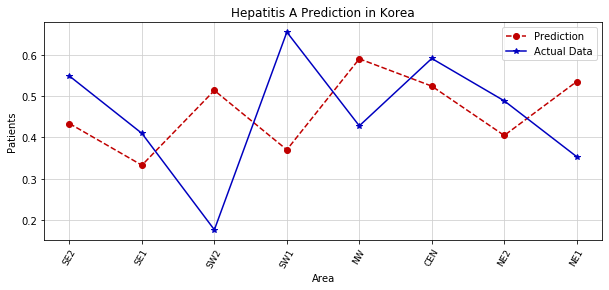

In [31]:
plt.figure(figsize=(10,4))
plt.title("Hepatitis A Prediction in Korea")
plt.plot(pred_list,color="#C00000",ls='--',marker='o', label="Prediction")
plt.plot(act_list,color="#0000C0",ls='-',marker='*', label="Actual Data")
plt.grid(color="#D0D0D0")
plt.xticks(ticks=list(range(len(area))),labels=area,fontsize=9,rotation=60)
plt.xlabel("Area")
plt.ylabel("Patients")
plt.legend()
plt.show()

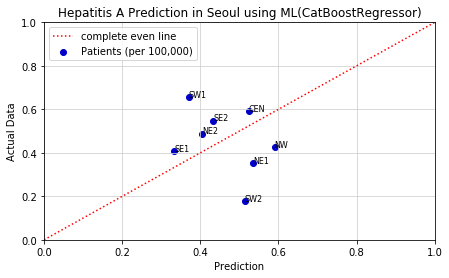

In [33]:
plt.figure(figsize=(7,4))
plt.title("Hepatitis A Prediction in Seoul using ML(CatBoostRegressor)")
plt.scatter(pred_list,act_list,label="Patients (per 100,000)",color="#0000CC")
plt.plot([0,1,2],[0,1,2],color="red",ls=":",label="complete even line")
plt.grid(color="#D0D0D0")
plt.xlabel("Prediction")
plt.ylabel("Actual Data")
for i in range(len(area)):
    if(pred_list[i]<2):
        plt.text(pred_list[i],act_list[i],area[i],fontsize=8)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()